In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import normal

#------------#
# Parameters #
#------------#
N=100            # サンプルを取得する位置 x の個数
M=[0,1,3,30]     # 多項式の次数

# データセット {x_n,y_n} (n=1...N) を用意
def create_dataset(num):
    dataset = DataFrame(columns=['x','y'])
    for i in range(num):
        x = float(i)/float(num-1)
        y = np.sin(2*np.pi*x) + normal(scale=0.3)
        dataset = dataset.append(Series([x,y], index=['x','y']),
                                 ignore_index=True)
    return dataset

# 平方根平均二乗誤差（Root mean square error）を計算
def rms_error(dataset, f):
    err = 0.0
    for index, line in dataset.iterrows():
        x, y = line.x, line.y
        err += 0.5 * (y - f(x))**2
    return np.sqrt(2 * err / len(dataset))

# 最小二乗法で解を求める
def resolve(dataset, m):
    t = dataset.y
    phi = DataFrame()
    for i in range(0,m+1):
        p = dataset.x**i
        p.name="x**%d" % i
        phi = pd.concat([phi,p], axis=1)
    tmp = np.linalg.inv(np.dot(phi.T, phi))
    ws = np.dot(np.dot(tmp, phi.T), t)

    def f(x):
        y = 0
        for i, w in enumerate(ws):
            y += w * (x ** i)
        return y

    return (f, ws)

Table of the coefficients
         M=0       M=1        M=3          M=30
0  -0.058829  0.884992  -0.347313  4.231034e+00
1        NaN -1.887643  12.792275  1.075714e+02
2        NaN       NaN -36.165689 -2.650511e+03
3        NaN       NaN  23.793505  2.266175e+04
4        NaN       NaN        NaN -1.164970e+05
5        NaN       NaN        NaN  4.034917e+05
6        NaN       NaN        NaN -9.195114e+05
7        NaN       NaN        NaN  1.218813e+06
8        NaN       NaN        NaN -4.455331e+05
9        NaN       NaN        NaN -1.449489e+06
10       NaN       NaN        NaN  3.050497e+06
11       NaN       NaN        NaN -2.898775e+06
12       NaN       NaN        NaN  9.345339e+05
13       NaN       NaN        NaN  9.713367e+05
14       NaN       NaN        NaN -4.887541e+05
15       NaN       NaN        NaN -3.847593e+05
16       NaN       NaN        NaN -1.475493e+06
17       NaN       NaN        NaN  1.655660e+06
18       NaN       NaN        NaN  1.080475e+06
19       NaN  

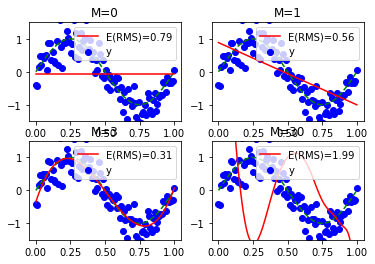

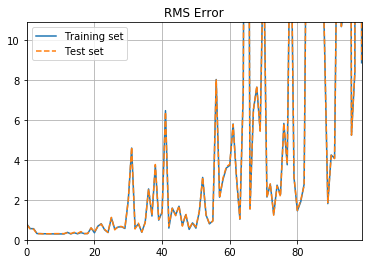

In [81]:
train_set = create_dataset(N)
test_set = create_dataset(N)
df_ws = DataFrame()

# 多項式近似の曲線を求めて表示
fig = plt.figure()
for c, m in enumerate(M):
    f, ws = resolve(train_set, m)
    df_ws = df_ws.append(Series(ws,name="M=%d" % m))

    subplot = fig.add_subplot(2,2,c+1)
    subplot.set_xlim(-0.05,1.05)
    subplot.set_ylim(-1.5,1.5)
    subplot.set_title("M=%d" % m)

    # トレーニングセットを表示
    subplot.scatter(train_set.x, train_set.y, marker='o', color='blue')

    # 真の曲線を表示
    linex = np.linspace(0,1,101)
    liney = np.sin(2*np.pi*linex)
    subplot.plot(linex, liney, color='green', linestyle='--')

    # 多項式近似の曲線を表示
    linex = np.linspace(0,1,101)
    liney = f(linex)
    label = "E(RMS)=%.2f" % rms_error(train_set, f)
    subplot.plot(linex, liney, color='red', label=label)
    subplot.legend(loc=1)

# 係数の値を表示
print "Table of the coefficients"
print df_ws.transpose()
fig.show()

# トレーニングセットとテストセットでの誤差の変化を表示
df = DataFrame(columns=['Training set','Test set'])
for m in range(0,100):   # 多項式の次数
    f, ws = resolve(train_set, m)
    train_error = rms_error(train_set, f)
    test_error = rms_error(test_set, f)
    df = df.append(
            Series([train_error, test_error],
                index=['Training set','Test set']),
            ignore_index=True)
df.plot(title='RMS Error', style=['-','--'], grid=True, ylim=(0,10.9))
plt.show()

# Refactor

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import normal

In [54]:
# データセット {x_n,y_n} (n=1...N) を用意
def create_dataset(num):
    dataset = DataFrame(columns=['x','y'])
    for i in range(num):
        x = float(i)/float(num-1)
        y = np.sin(2*np.pi*x) + normal(scale=0.3)
        dataset = dataset.append(Series([x,y], index=['x','y']),
                                 ignore_index=True)
    return dataset

# 平方根平均二乗誤差（Root mean square error）を計算
def rms_error(dataset, f):
    err = 0.0
    for index, line in dataset.iterrows():
        x, y = line.x, line.y
        err += 0.5 * (y - f(x))**2
    return np.sqrt(2 * err / len(dataset))

# 最小二乗法で解を求める
def resolve(dataset, m):
    t = dataset.y
    phi = DataFrame()
    for i in range(0,m+1):
        p = dataset.x**i
        p.name="x**%d" % i
        phi = pd.concat([phi,p], axis=1)
    tmp = np.linalg.inv(np.dot(phi.T, phi))
    ws = np.dot(np.dot(tmp, phi.T), t)

    def f(x):
        y = 0
        for i, w in enumerate(ws):
            y += w * (x ** i)
        return y

    return (f, ws)

In [55]:
#------------#
# Parameters #
#------------#
N=10            
M=[0,1,3,9]     

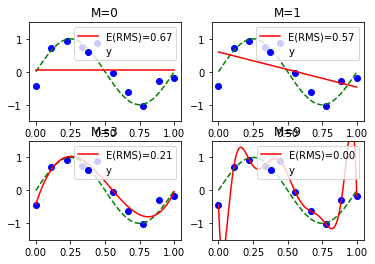

In [56]:
train_set = create_dataset(N)
test_set = create_dataset(N)
df_ws = DataFrame()

fig = plt.figure()
for c, m in enumerate(M):
    f, ws = resolve(train_set, m)
    df_ws = df_ws.append(Series(ws,name="M=%d" % m))

    subplot = fig.add_subplot(2,2,c+1)
    subplot.set_xlim(-0.05,1.05)
    subplot.set_ylim(-1.5,1.5)
    subplot.set_title("M=%d" % m)

    # トレーニングセットを表示
    subplot.scatter(train_set.x, train_set.y, marker='o', color='blue')

    # 真の曲線を表示
    linex = np.linspace(0,1,101)
    liney = np.sin(2*np.pi*linex)
    subplot.plot(linex, liney, color='green', linestyle='--')

    # 多項式近似の曲線を表示
    linex = np.linspace(0,1,101)
    liney = f(linex)
    label = "E(RMS)=%.2f" % rms_error(train_set, f)
    subplot.plot(linex, liney, color='red', label=label)
    subplot.legend(loc=1)
fig.show()

In [57]:
# 係数の値を表示
print "Table of the coefficients"
print df_ws.transpose()

Table of the coefficients
        M=0       M=1        M=3            M=9
0  0.067599  0.601030  -0.417880      -0.443924
1       NaN -1.066863  12.833237    -121.023635
2       NaN       NaN -33.366766    3138.629724
3       NaN       NaN  20.912466  -28931.252081
4       NaN       NaN        NaN  136550.980517
5       NaN       NaN        NaN -371291.250030
6       NaN       NaN        NaN  604966.558278
7       NaN       NaN        NaN -583323.505447
8       NaN       NaN        NaN  306891.552552
9       NaN       NaN        NaN  -67880.430652


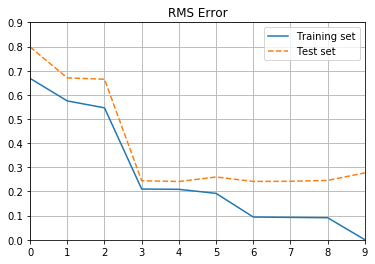

In [58]:
df = DataFrame(columns=['Training set','Test set'])
for m in range(0,10):   # 多項式の次数
    f, ws = resolve(train_set, m)
    train_error = rms_error(train_set, f)
    test_error = rms_error(test_set, f)
    df = df.append(
            Series([train_error, test_error],
                index=['Training set','Test set']),
            ignore_index=True)
df.plot(title='RMS Error', style=['-','--'], grid=True, ylim=(0,0.9))
plt.show()